<a href="https://colab.research.google.com/github/madonnaojorin/MAT494/blob/main/1.4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.4.1 Singular Value Decomposition

####Theorem 1.4.1 <br>
If an $m\times n$ matrix A has $r$ nonzero singular values, $\sigma_1,\cdots,\sigma_r \geq 0$ with $\sigma_{r+1}=\cdots=\sigma_n=0$, then the dimension of $\text{col}(A) = r$.

####Theorem 1.4.2 (The Singular Value Decomposition) <br>
Let A be an $m\times n$ matrix with the dimension of $\text{col}(A) = r$. Then there exists an $m\times n$ matrix $\Sigma$, where
the diagonal entries in $D$ are the first $r$ singular values of $A$ $\sigma_1 \geq \sigma_2 \geq \cdots\geq \sigma_r\geq 0$, and there exist an $m\times m$ orthogonal matrix $U$ and an $n\times n$ orthogonal
matrix $V$ such that 
$$A = U \Sigma V^T.$$

In [3]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [6]:
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


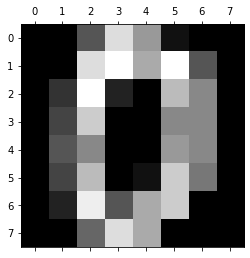

In [7]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

In [23]:
#Singular Value Decomposition 
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
Sigma = S[:, :n_component]
VT = VT[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 0.00 5.00 13.00 9.00 1.00 0.00 0.00]
 [0.00 0.00 13.00 15.00 10.00 15.00 5.00 0.00]
 [0.00 3.00 15.00 2.00 -0.00 11.00 8.00 0.00]
 [0.00 4.00 12.00 -0.00 -0.00 8.00 8.00 0.00]
 [0.00 5.00 8.00 -0.00 -0.00 9.00 8.00 0.00]
 [0.00 4.00 11.00 -0.00 1.00 12.00 7.00 0.00]
 [0.00 2.00 14.00 5.00 10.00 12.00 0.00 0.00]
 [0.00 -0.00 6.00 13.00 10.00 -0.00 -0.00 0.00]]


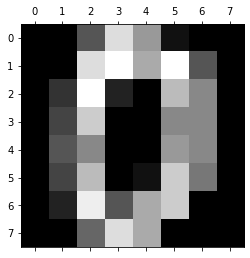

In [19]:
plt.matshow(A, cmap = 'gray')

##1.4.2 Low-Rank Matrix Approximations


####Definition 1.4.3 (Induced Norm) <br>
The 2-norm of a matrix $A \in \mathbb{R}^{n\times m}$ is
$$||A||^2 = \max_{0\neq \textbf{x}\in\mathbb{R}^m}\frac{||A\textbf{x||}}{||\textbf{x}||}=\max_{\textbf{x}\neq 0,||\textbf{x}||=1}||A\textbf{x}|| =\max_{\textbf{x}\neq 0,||\textbf{x}||=1}\textbf{x}^TA^TA\textbf{x}$$
Let $A \in \mathbb{R}^{n\times m}$ be a matrix with SVD
$$A =\sum_{j=1}^r\sigma_j\textbf{u}_j\textbf{v}_j^T.$$

For $k < r$, truncate the sum at the k-th term
$$A_k =\sum_{j=1}^k\sigma_j\textbf{u}_j\textbf{v}_j^T.$$
The rank of $A_k$ is exactly $k$. Indeed, by construction,
1. the vectors ${\textbf{u}_j: j = 1,\cdots, k}$ are orthonormal, and
2. since $\sigma_j > 0$ for $j = 1,\cdots, k$ and the vectors $\{\textbf{v}_j: j = 1,\cdots, k\}$ are orthonormal,$\{\textbf{u}_j: j = 1,\cdots, k\}$ spans the column space of $A_k$.


####Lemma 1.4.4 (Matrix Norms and Singular Values)<br>
Let $A \in\mathbb{R}^{n\times m}$ be a matrix with SVD
$$A =\sum_{j=1}^r\sigma_j\textbf{u}_j\textbf{v}_j^T.$$
where recall that $\sigma_1\geq\sigma_2\geq\cdots\sigma_r>0$ and let $A_k$ be the truncation defined
above. Then
$$||A−A_k||^2_2 = σ^2_{k+1}$$

####Theorem 1.4.5 (Eckart-Young-Mirsky theorem) (Low-Rank Approximation in the Induced Norm):<br>
Let $A \in \mathbb{R}^{n\times m}$ be a matrix with SVD
$$A =\sum_{j=1}^r\sigma_j\textbf{u}_j\textbf{v}_j^T.$$
and let $A_k$ be the truncation defined above with $k < r$. For any matrix $B \in\mathbb{R}^{n\times m}$
of rank at most $k$,
$$||A−A_k||_2 \leq ||A−B||_2.$$ 

##1.4.3 Principal Component Analysis
###1.4.3.1 Covariance Matrix
To prepare for principal component analysis, let $[\textbf{X}_1\cdots \textbf{X}_N]$ be a $p\times N$ matrix
of observation, such as describe above. The sample mean $M$ of the observation vectors $[\textbf{X}_1\cdots \textbf{X}_n]$ is given by
$$M=\frac{1}{N}(\textbf{X}_1\cdots \textbf{X}_N)$$
For $k = 1, \cdots,N$, let
$$\hat{\textbf{X}_k} = \textbf{X}_k-\textbf{M}.$$
The columns of the $p\times N$ matrix
$$B =[\hat{\textbf{X}_1},\hat{\textbf{X}_1},\cdots,\hat{\textbf{X}_N}]$$
have a zero sample mean, and $B$ is said to be in mean-deviation form.
The (sample) covariance matrix is the $p\times p$ matrix $S$ defined by
$$S =\frac{1}{N-1}BB^T$$
Since any matrix of the form $BB^T$ is positive semidefinite, so is $S$.


###1.4.3.2 Principal Component Analysis
Now assume that the columns of the p×N data matrix
$X = [\textbf{X}_1\cdots \textbf{X}_N]$
is already in mean-deviation from. The goal of principal component analysis (PCA) is to find $k, (k \leq p)$ orthonormal vectors $\textbf{v}_1,\cdots,\textbf{v}_k$, (top $k$ principal components) that maximize the objective function
$$\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^k\langle \textbf{X}_i\cdot \textbf{v}_j\rangle^2$$
$\langle \textbf{X}_i\cdot \textbf{v}_j\rangle$ is the length of projection of $\textbf{X}_i$ on $\textbf{v}_j$.
On the other hand, for each $j$, it is easy to see that
$$\textbf{v}_j^TXX^T \textbf{v}_j = (X^T \textbf{v}_j)^T (X^T \textbf{v}_j) = \sum_{i=1}^N\langle\textbf{X}_i \cdot\textbf{v}_j\rangle^2$$
where $XX^T$ is a $p \times p$ matrix. As a result, for each $j \leq k$, the variance-maximization problem can be rephrased as 
$$argmax_{\textbf{v}:||\textbf{v}||=1}\textbf{v}_j^TXX^T \textbf{v}_j$$ 
Assume that
$$XX^T =Vdiag(\lambda_1,\cdots,\lambda_p)V^T, \text{ or } V^TXX^TV = (\lambda_1,\cdots,\lambda_p)$$.
In view of Theorem 1.4.5, we conclude that the optimal choice of the first $k$ eigenvectors of $XX^T$ corresponding to the first $k$ largest eigenvalues, which are also the first $k$ columns of $V =[\textbf{v}_1,\cdots,\textbf{v}_p]$ of the covariance matrix $XX^T$, which are called the principal components of the data (in the matrix’ of observations).
The first principal component is the eigenvector corresponding to the largest eigenvalue of $XX^T$ , the second principal component is the eigenvector
corresponding to the second largest eigenvalue, and so on.
The orthogonal $p\times p$ matrix $V = [\textbf{v}_1,\cdots,\textbf{v}_p]$ that determines a change of variable, $\textbf{x} =V\textbf{y}$, or 
$$\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_p
\end{pmatrix}=\begin{pmatrix}
\textbf{v}_1 \textbf{v}_1 \cdots\textbf{v}_p
\end{pmatrix}
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_p
\end{pmatrix}$$\\
with the property that the new variables $y_1,\cdots,y_p$ are uncorrelated and are arranged in order of decreasing variance. Indeed, we have
$$\textbf{x}^TXX^T \textbf{x} = \textbf{y}^TV^TXX^TV\textbf{y} = \textbf{y}^T \text{diag}(\lambda_1, \cdots,\lambda_p)\textbf{y} =\sum_1^p\lambda_iy_i^2.$$
The orthogonal change of variable $\textbf{x} = V\textbf{y}$ that each observation vector \textbf{x} receives a ”new name” $\textbf{y}$, such that $\textbf{x} = V\textbf{y}$. Notice that $\textbf{y} = V^{-1}\textbf{x} = V^T \textbf{x}$.
Let $v_{1i},\cdots,v_{pi}$ be the entries in $v_i$. Since $v^T_i$ the ith row of $V^T$, the equation $\textbf{y} =V^T \textbf{x}$ shows that 
$$y_i = \textbf{v}^T_i\textbf{x} = v_{1i}x_1+v_{2i}x_2+\cdots+v_{pi}x_p$$
Thus $y_i$ is a linear combination of the original variables $x_1,\cdots,x_p$, using the
entries the eigenvector $\textbf{v}_i$ as weights, which are called loadings.

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

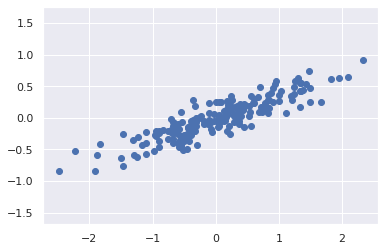

In [26]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-0.94 -0.33]
 [-0.33 0.94]]
[0.76 0.02]


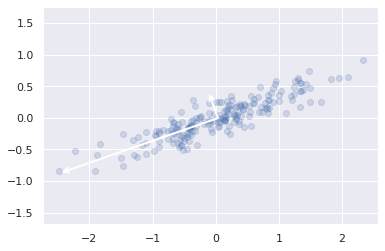

In [29]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [30]:
# PCA as a dimensionality reduction transform
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


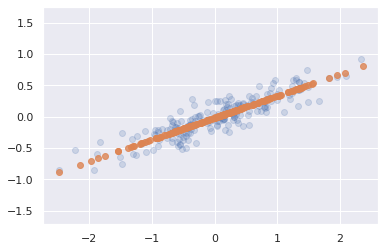

In [31]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [33]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


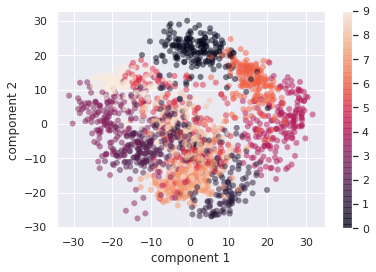

In [35]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)#,
#            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

###1.4.3.3 Total Variance
Given the columns of the p×N data matrix and assume it is already in mean-deviation from
$$X=[\textbf{X}_1,\textbf{X}_2,\cdots, \textbf{X}_N]$$
and let covariance matrix $S$
$$S =\frac{1}{N-1}XX^T.$$
The entries in $S=[S_{ij}]$, for $j =1,\cdots, p$, the diagonal entry $s_{jj}$ in $S$ is called the variance of $x_j$, which is the first $j$-th row of $X$. The variance of $x_j$ measures the spread of the values of $x_j$. The total variance of the data is the sum of the variances on the diagonal of $S$. In general, the sum of the diagonal entries
of a square matrix $S$ is called the trace of the matrix, written $tr(S)$. Thus 
$$\text{Total Variance} = tr (S)$$
Note that if
$$XX^T =V\text{diag}(\lambda_1,\cdots,\lambda_p)V^T , \text{ or }V^TXX^TV = \text{diag}(\lambda_1,\cdots,\lambda_p)$$.
then
$$tr(S) =
\frac{1}{N-1}\sum_1^p\lambda_j$$
because $tr(VSV^T)=tr(S)$. Thus the fraction of the variances of the first $k$ term truncation is
$$\frac{\sum_1^k\lambda_j}{\sum_1^p\lambda_j}.$$